## Presenting the Calendar! 📅

To explain some of the terminology used in this package, the image below can be used as reference.

The calendar system revolves around so-called "anchor dates" and "anchor years". The **anchor date** is (generally) the start of the period you want to forecast. I.e. your target data. The anchor date is an abstract date, and does not include a year. For example, 5 June, or 25 December 🎄.

**Anchor years** are used to create a full date with the anchor date (e.g., 25 December 2022), and to group precursor or target intervals together.

Two types of intervals exist. First are the **target intervals**, which is generally what you want to predict or forecast. The other type are **precursor intervals**, intervals preceding the anchor date representing the data that you would like to use to forecast what the target interval will be.

<img src="calendar_drawing.png" width="800">


First we import the package, and create an empty calendar with the anchor date 25 December:

In [32]:
import s2spy.time
cal = s2spy.time.Calendar("12-25")  # 🎄🎅
cal

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=None,
    intervals=None
)

To this calendar we can add an interval, in this case a "target" interval which we want to use as our target data:

In [33]:
cal.add_interval("target", length="1d")

When viewing the calendar, you can see that the calendar now contains this interval

In [31]:
cal

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=None,
    intervals=[
        Interval(role='target', length='1d', gap='0d')
    ]
)

However, this calendar is not mapped to any years yet. Before we can view which dates are represented by each interval, we have to map the calendar:

In [35]:
cal.map_years(2022, 2022)

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=('years', 2022, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d')
    ]
)

Now we can call `.show()` and view the intervals generated. A table is returned, showing the anchor year(s) on the vertical axis and the intervals on the horizontal index, sorted by their interval index (`i_interval`).

In [36]:
cal.show()

i_interval,1
anchor_year,
2022,"[2022-12-25, 2022-12-26)"


We can add some precursor periods, and inspect the table again. Note that the target interval has a positive index, while the precursors have negative indices.

In [37]:
for _ in range(6):
    cal.add_interval("precursor", length="1d")
cal.show()

i_interval,-6,-5,-4,-3,-2,-1,1
anchor_year,,,,,,,
2022,"[2022-12-19, 2022-12-20)","[2022-12-20, 2022-12-21)","[2022-12-21, 2022-12-22)","[2022-12-22, 2022-12-23)","[2022-12-23, 2022-12-24)","[2022-12-24, 2022-12-25)","[2022-12-25, 2022-12-26)"


Besides a table view, the calendar can also be visualized in a plot

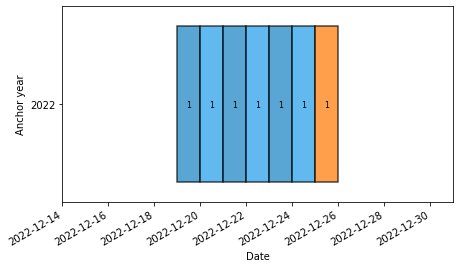

In [38]:
cal.visualize(add_legend=False, show_length=True)

import matplotlib.pyplot as plt; fig = plt.gcf(); fig.autofmt_xdate()

### The repr 📜

In [8]:
cal

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=('years', 2022, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d')
    ]
)

In [9]:
from s2spy.time import Calendar, Interval
cal = Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=('years', 2022, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d')
    ]
)
print(cal.__str__())

Calendar(
    anchor='12-25',
    allow_overlap=False,
    mapping=('years', 2022, 2022),
    intervals=[
        Interval(role='target', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d'),
        Interval(role='precursor', length='1d', gap='0d')
    ]
)


In [12]:
for _ in  range(2):
    cal.add_interval("precursor", length="1M")

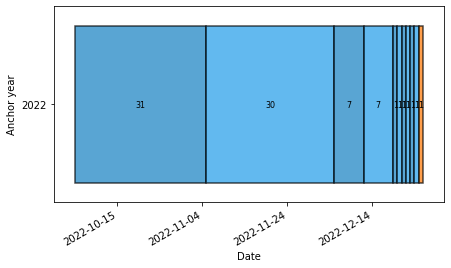

In [13]:
cal.visualize(add_legend=False, show_length=True)
fig = plt.gcf(); fig.autofmt_xdate()
plt.show()

### Editting calendars in-place 🏗️

In [14]:
cal.precursors

[Interval(role='precursor', length='1d', gap='0d'),
 Interval(role='precursor', length='1d', gap='0d'),
 Interval(role='precursor', length='1d', gap='0d'),
 Interval(role='precursor', length='1d', gap='0d'),
 Interval(role='precursor', length='1d', gap='0d'),
 Interval(role='precursor', length='1d', gap='0d'),
 Interval(role='precursor', length='1W', gap='0d'),
 Interval(role='precursor', length='1W', gap='0d'),
 Interval(role='precursor', length='1M', gap='0d'),
 Interval(role='precursor', length='1M', gap='0d')]

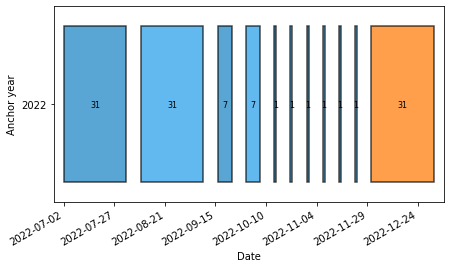

In [19]:
for precursor in cal.precursors:
    precursor.gap = "7d"

for target in cal.targets:
    target.length="1M"

cal.map_years(2022, 2022)
cal.visualize(add_legend=False, show_length=True)
fig = plt.gcf(); fig.autofmt_xdate()

In [21]:
from copy import deepcopy
calendar_2 = deepcopy(cal)

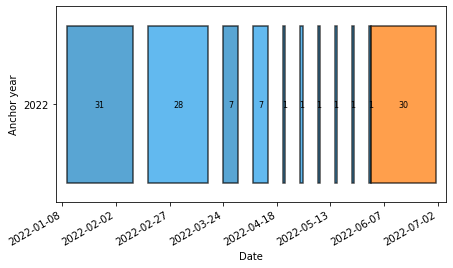

In [22]:
cal.precursors[0].gap = "6M"
cal.targets[0].gap = "-6M"
cal.visualize(add_legend=False, show_length=True)
fig = plt.gcf(); fig.autofmt_xdate()

### The `Interval` building block 🧱

In [24]:
Interval("target", length="5d", gap="1M")

Interval(role='target', length='5d', gap='1M')

In [25]:
Interval(role='target', length='5d', gap='1M')

Interval(role='target', length='5d', gap='1M')

### Anchors! ⚓

In [26]:
cal = Calendar(anchor="December")  # [December 01)
cal.add_interval("target", "1M")
for _ in range(11):
    cal.add_interval("precursor", "1M")
cal.map_years(2022, 2022)
cal.show()

i_interval,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1
anchor_year,,,,,,,,,,,,
2022,"[2022-01-01, 2022-02-01)","[2022-02-01, 2022-03-01)","[2022-03-01, 2022-04-01)","[2022-04-01, 2022-05-01)","[2022-05-01, 2022-06-01)","[2022-06-01, 2022-07-01)","[2022-07-01, 2022-08-01)","[2022-08-01, 2022-09-01)","[2022-09-01, 2022-10-01)","[2022-10-01, 2022-11-01)","[2022-11-01, 2022-12-01)","[2022-12-01, 2023-01-01)"


In [27]:
Calendar(anchor="W12")  # Week 12
cal = Calendar(anchor="W12-5")  # Friday on week 12
cal.add_interval("target", "1d")
cal.add_interval("precursor", "1d", gap="1W")
cal.map_years(2018, 2022)
cal.show()

i_interval,-1,1
anchor_year,,
2022,"[2022-03-17, 2022-03-18)","[2022-03-25, 2022-03-26)"
2021,"[2021-03-18, 2021-03-19)","[2021-03-26, 2021-03-27)"
2020,"[2020-03-19, 2020-03-20)","[2020-03-27, 2020-03-28)"
2019,"[2019-03-21, 2019-03-22)","[2019-03-29, 2019-03-30)"
2018,"[2018-03-15, 2018-03-16)","[2018-03-23, 2018-03-24)"
